In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("file:///F:/diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


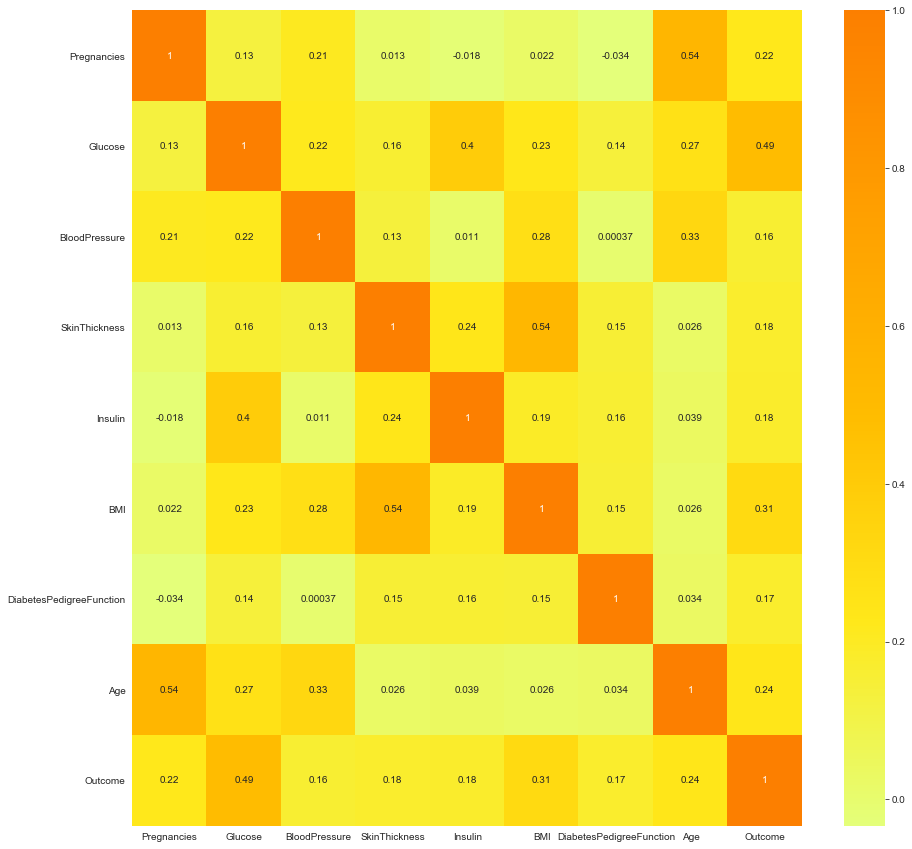

In [60]:
plt.figure(figsize=(15,15))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Wistia')

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [58]:
df.describe().T

count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000   1.000000   
Glucose                   768.0  121.681605  30.436016  44.000  99.750000   
BloodPressure             768.0   72.254807  12.115932  24.000  64.000000   
SkinThickness             768.0   26.606479   9.631241   7.000  20.536458   
Insulin                   768.0  118.660163  93.080358  14.000  79.799479   
BMI                       768.0   32.450805   6.875374  18.200  27.500000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078   0.243750   
Age                       768.0   33.240885  11.760232  21.000  24.000000   
Outcome                   768.0    0.348958   0.476951   0.000   0.000000   

                                 50%        75%     max  
Pregnancies                 3.000000    6.00000   17.00  
Glucose                   117.000000  140.25000  199.00  
BloodPressure              72.000000   80.00000  122.00  
SkinThickness              23.000000   32.00000   99.00  
Insulin                    79.799479  127.25000  846.00  
BMI                        32.000000   36.60000   67.10  
DiabetesPedigreeFunction    0.372500    0.62625    2.42  
Age                        29.000000   41.00000   81.00  
Outcome                     0.000000    1.00000    1.00

In [7]:
exists=0 in df.Glucose
print(exists)

True


In [8]:
col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']

In [10]:
for cols in col:
    df[cols].replace(0,df[cols].mean(),inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EB615BB88>,
      dtype=object)

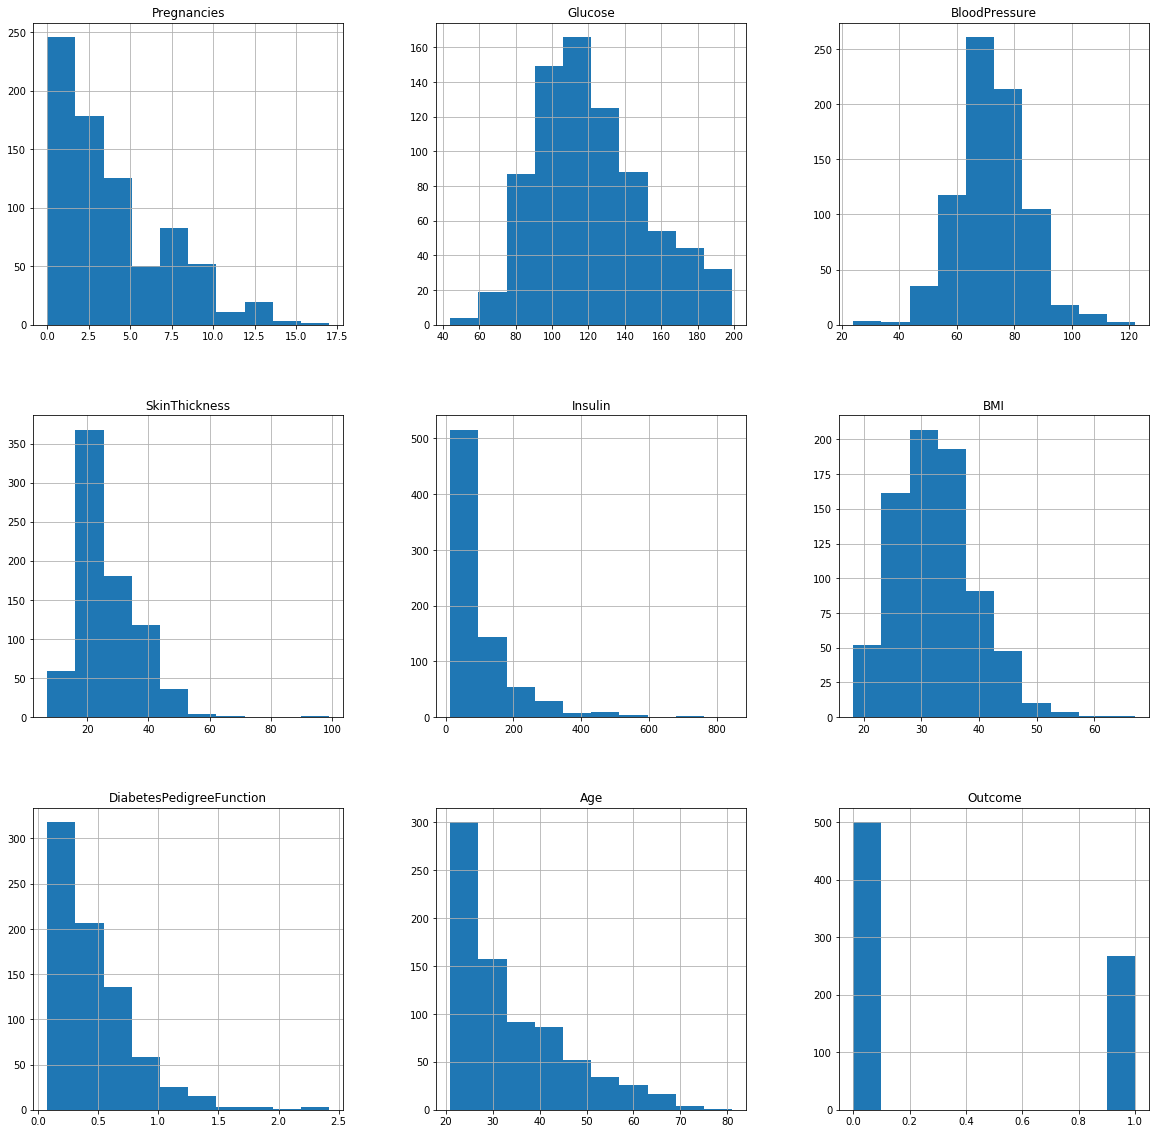

In [11]:
df.hist(figsize=(20,20))

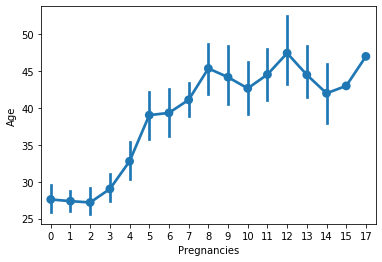

In [12]:
sns.pointplot(x="Pregnancies",y="Age",data=df)

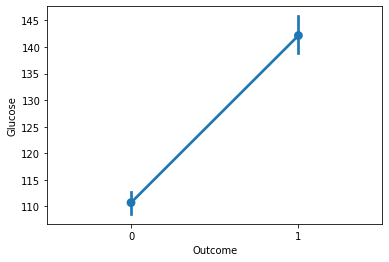

In [13]:
sns.pointplot(x="Outcome",y="Glucose",data=df)

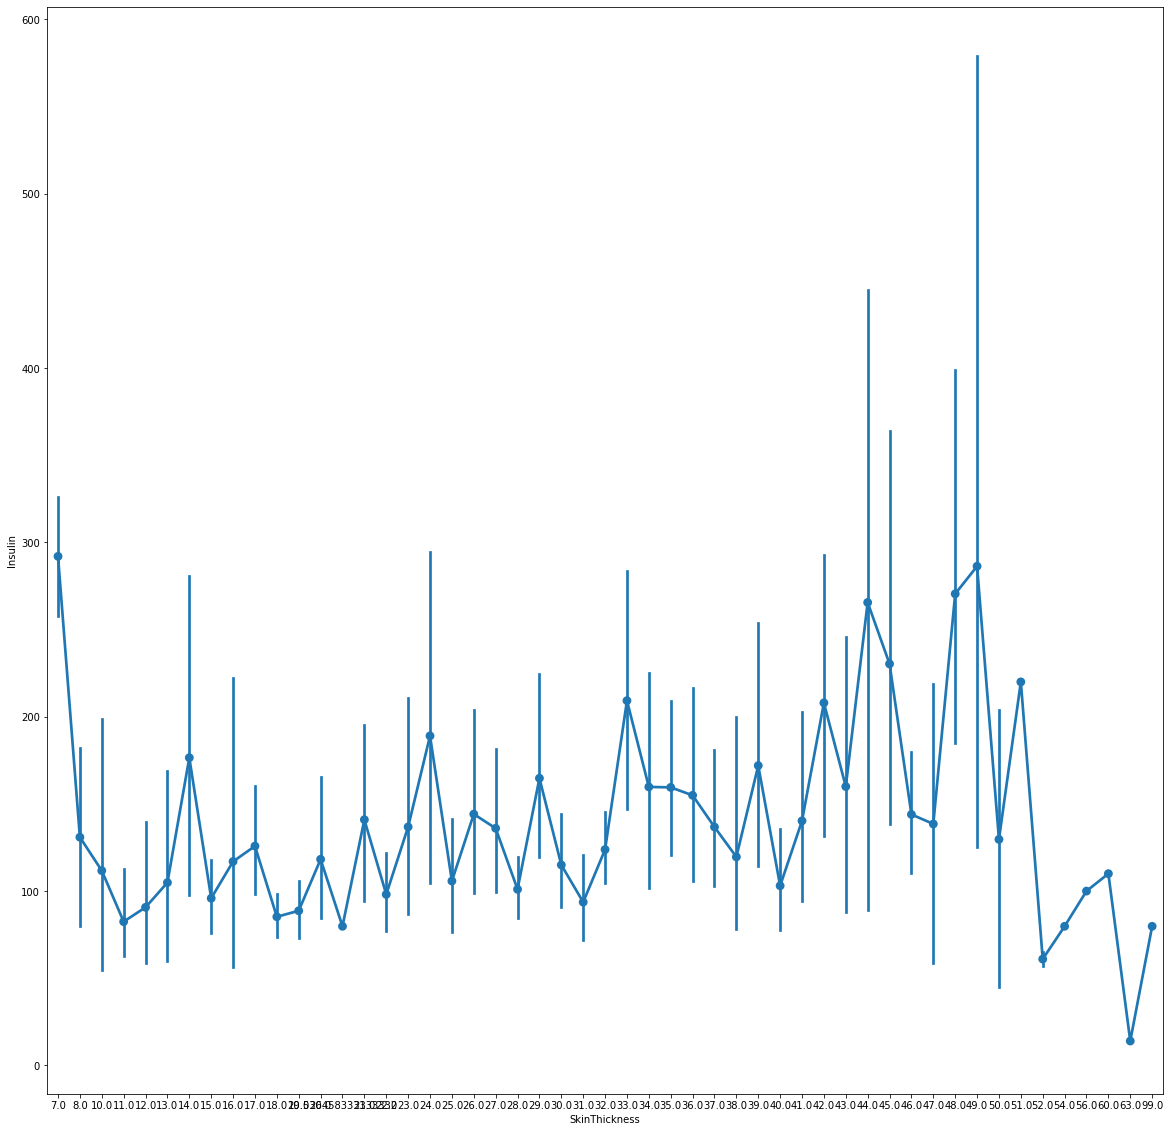

In [14]:
plt.figure(figsize=(20,20))
sns.pointplot(x="SkinThickness",y="Insulin",data=df)

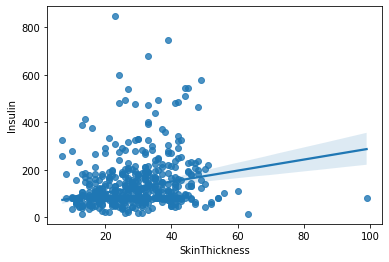

In [16]:
sns.regplot(x="SkinThickness",y="Insulin",data=df)

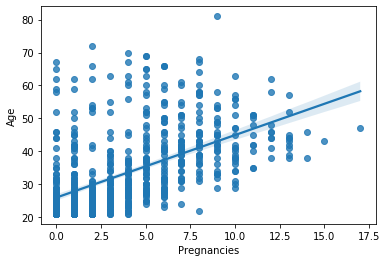

In [17]:
sns.regplot(x="Pregnancies",y="Age",data=df)

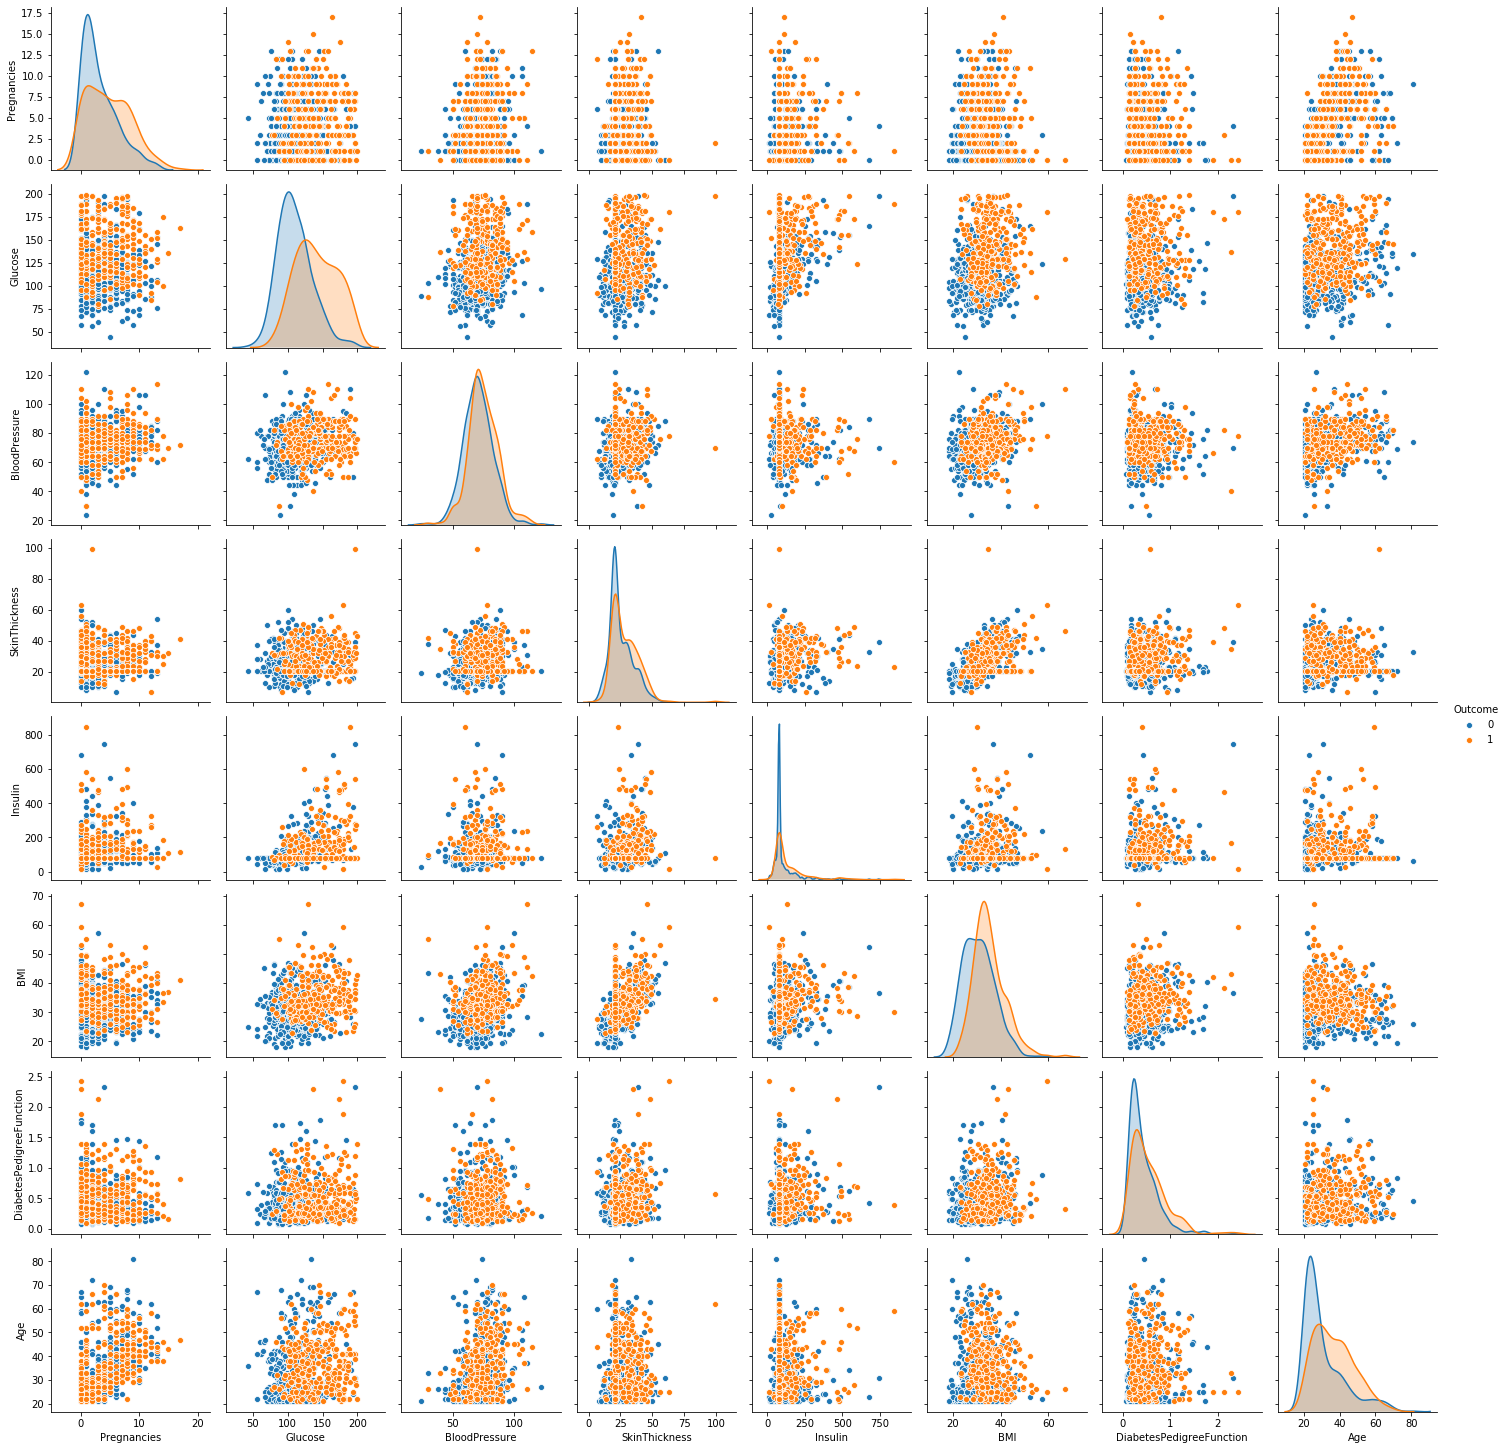

In [19]:
sns.pairplot(data=df,hue="Outcome")

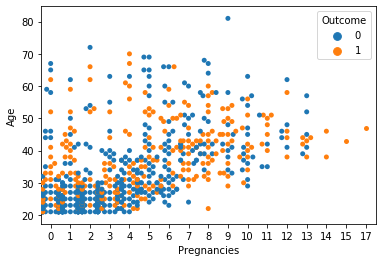

In [20]:
sns.swarmplot(x="Pregnancies",y="Age",data=df,hue="Outcome")

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()


In [29]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [30]:
x=df.iloc[:,:-1]

In [31]:
x

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [32]:
y=df.Outcome.values

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [37]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pre_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pre_lo)
accu_lo

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7012987012987013

In [39]:
print(classification_report(ytest,pre_lo))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       150
           1       0.62      0.40      0.48        81

    accuracy                           0.70       231
   macro avg       0.67      0.63      0.64       231
weighted avg       0.69      0.70      0.68       231



In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knc=KNeighborsClassifier()
knc.fit(xtrain,ytrain)
pre_knc=knc.predict(xtest)
accu_knc=accuracy_score(ytest,pre_knc)
accu_knc

0.7142857142857143

In [42]:
print(classification_report(ytest,pre_lo))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       150
           1       0.62      0.40      0.48        81

    accuracy                           0.70       231
   macro avg       0.67      0.63      0.64       231
weighted avg       0.69      0.70      0.68       231



In [43]:
from sklearn.svm import SVC


In [44]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pre_svc)
accu_svc

0.7792207792207793

In [45]:
print(classification_report(ytest,pre_lo))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       150
           1       0.62      0.40      0.48        81

    accuracy                           0.70       231
   macro avg       0.67      0.63      0.64       231
weighted avg       0.69      0.70      0.68       231



In [47]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pre_tre=svc.predict(xtest)
accu_tre=accuracy_score(ytest,pre_tre)
accu_tre


0.7792207792207793

In [48]:
print(classification_report(ytest,pre_lo))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       150
           1       0.62      0.40      0.48        81

    accuracy                           0.70       231
   macro avg       0.67      0.63      0.64       231
weighted avg       0.69      0.70      0.68       231



In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
pre_gbc=svc.predict(xtest)
accu_gbc=accuracy_score(ytest,pre_gbc)
accu_gbc


0.7792207792207793

In [51]:
print(classification_report(ytest,pre_lo))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       150
           1       0.62      0.40      0.48        81

    accuracy                           0.70       231
   macro avg       0.67      0.63      0.64       231
weighted avg       0.69      0.70      0.68       231



In [55]:
models = pd.DataFrame({
    'Model': ['Logistic','KNN', 'SVC',  'Decision Tree Classifier',
             'Gradient Boosting Classifier'],
    'Score': [ accu_lo,accu_knc, accu_svc, accu_tre, accu_gbc]
})

models.sort_values(by = 'Score', ascending = False)

Model     Score
2                           SVC  0.779221
3      Decision Tree Classifier  0.779221
4  Gradient Boosting Classifier  0.779221
1                           KNN  0.714286
0                      Logistic  0.701299

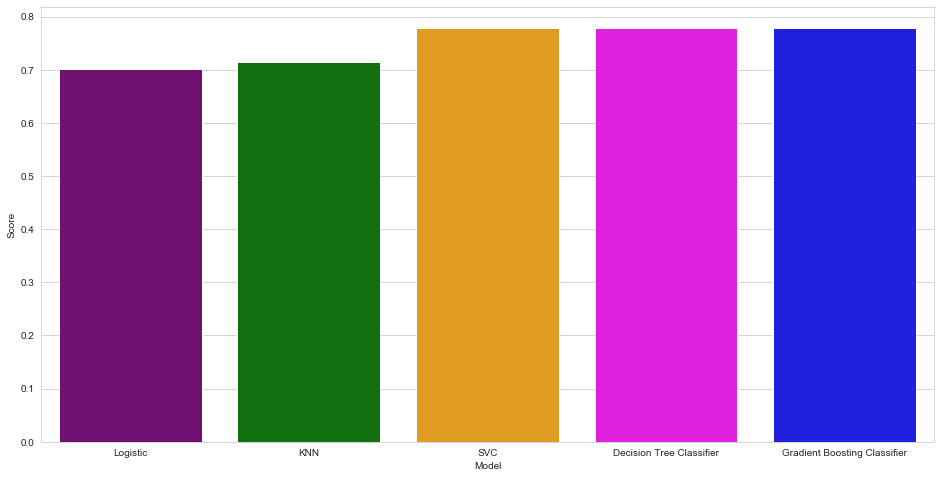

In [56]:
colors = ["purple", "green", "orange", "magenta","blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [57]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

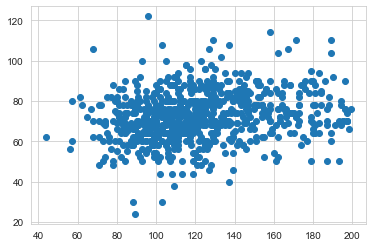

In [61]:
plt.scatter(df[['Glucose']],df['BloodPressure'])

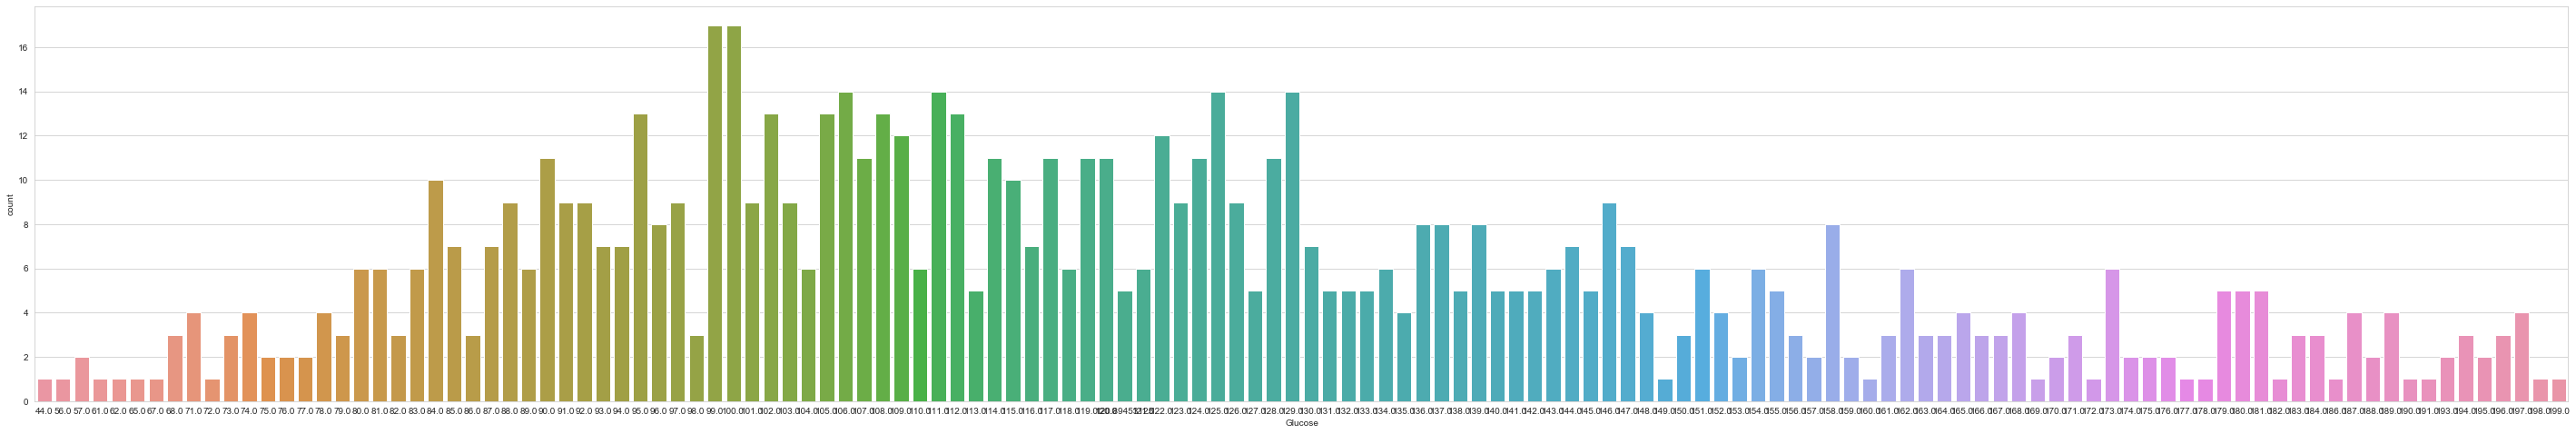

In [66]:
plt.figure(figsize=(50,8))
sns.countplot(df['Glucose'])

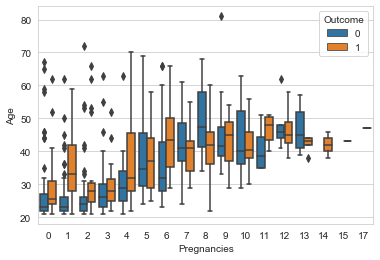

In [67]:
sns.boxplot(x="Pregnancies",y="Age",data=df,hue="Outcome")

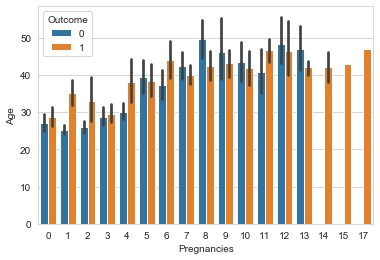

In [68]:
sns.barplot(x="Pregnancies",y="Age",data=df,hue="Outcome")

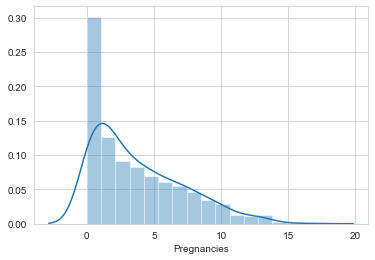

In [70]:
sns.distplot(df['Pregnancies'])

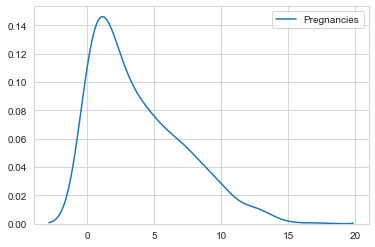

In [71]:
sns.kdeplot(df['Pregnancies'])

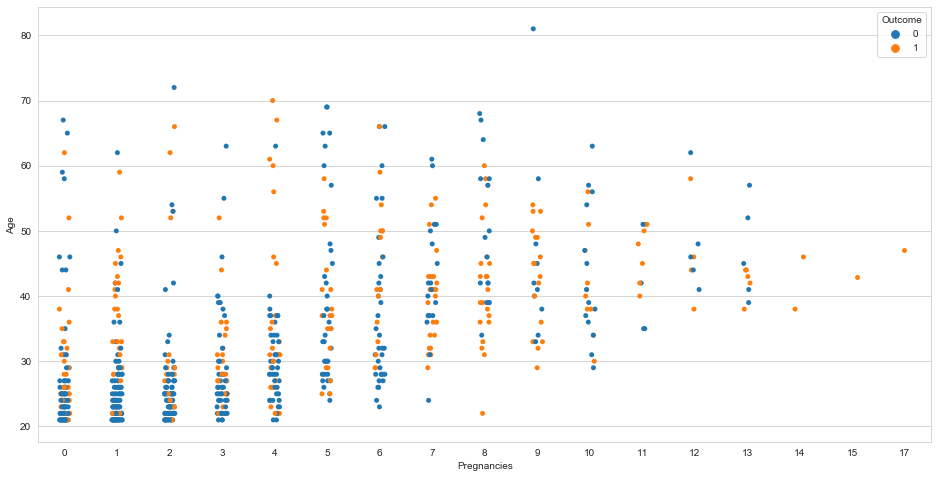

In [75]:
plt.figure(figsize=(16,8))
sns.stripplot(x="Pregnancies",y="Age",data=df,hue="Outcome")

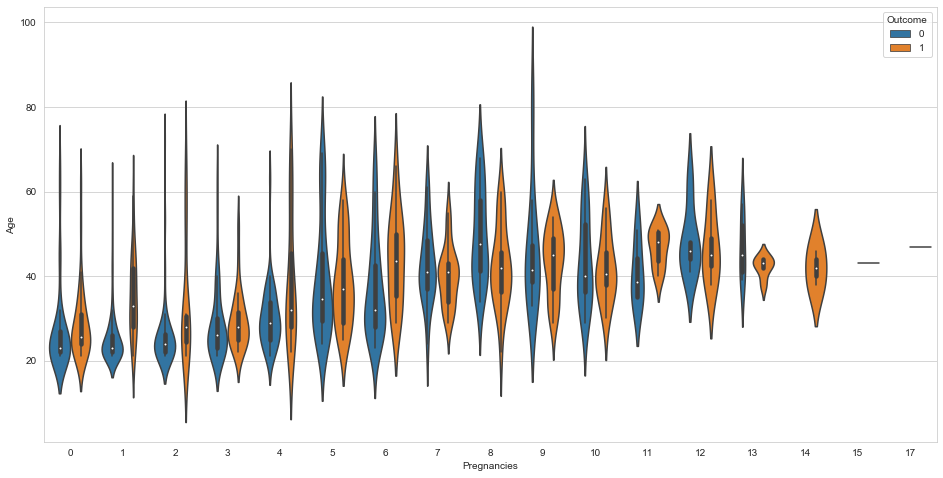

In [74]:
plt.figure(figsize=(16,8))
sns.violinplot(x="Pregnancies",y="Age",data=df,hue="Outcome")

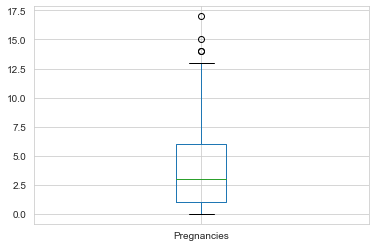

In [88]:
df.boxplot(column='Pregnancies')

In [89]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

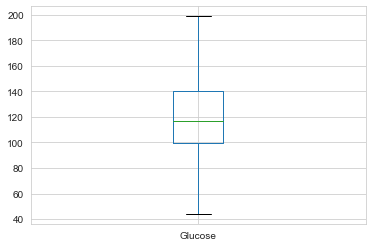

In [90]:
df.boxplot(column='Glucose')

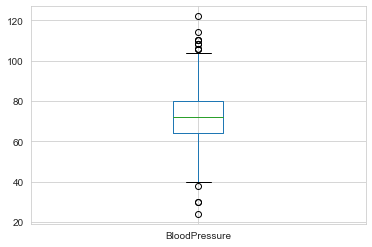

In [91]:
df.boxplot(column='BloodPressure')

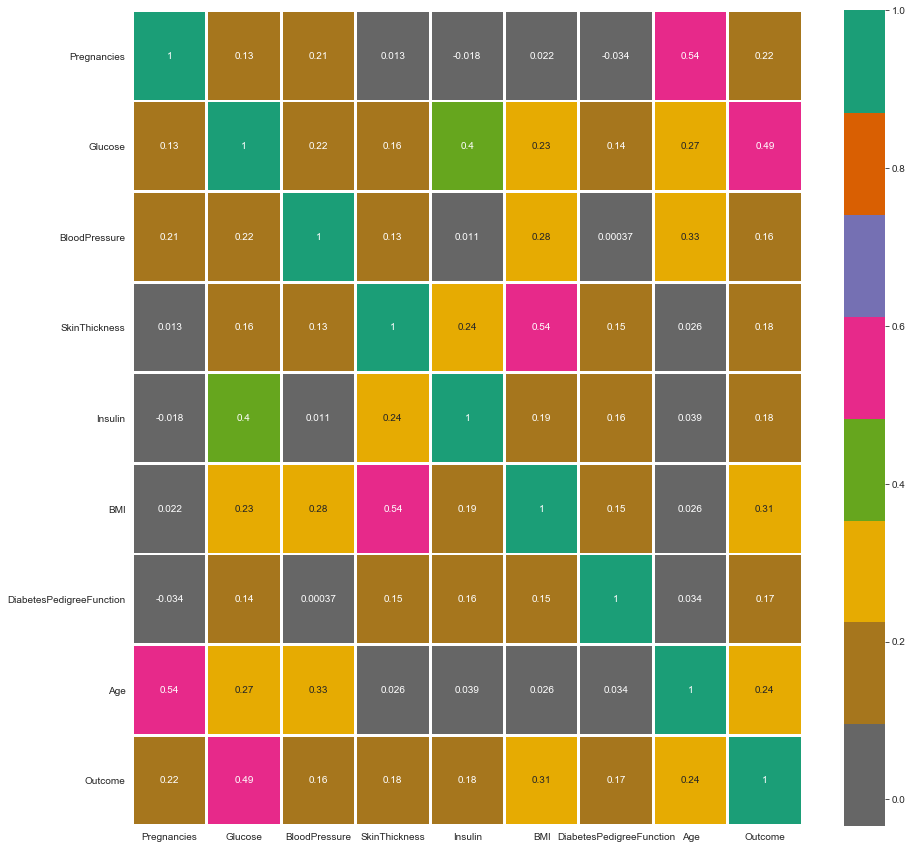

In [95]:
plt.figure(figsize=(15,15))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [96]:
import sweetviz as sv

In [97]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [98]:
from IPython.display import IFrame

In [99]:
IFrame(src='Analyze.html',width=1000,height=600)

In [100]:
from dataprep.eda import *

  0%|          | 0/1293 [00:00<?, ?it/s]

DataPrep Report
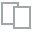
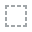
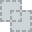
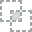
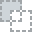
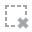
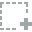
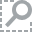
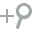
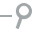
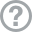
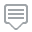
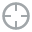
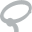
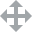
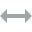
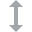
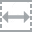
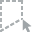
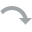
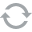
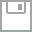
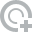
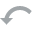
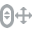
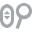
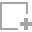
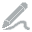
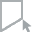
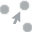
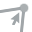
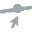

In [101]:
create_report(df)

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [104]:
man=MinMaxScaler()
feat=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df[feat]=man.fit_transform(df[feat])
df[feat]

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.670968       0.489796       0.304348  0.079086  0.314928   
1       0.058824  0.264516       0.428571       0.239130  0.079086  0.171779   
2       0.470588  0.896774       0.408163       0.147135  0.079086  0.104294   
3       0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4       0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.367742       0.530612       0.445652  0.199519  0.300613   
764     0.117647  0.503226       0.469388       0.217391  0.079086  0.380368   
765     0.294118  0.496774       0.489796       0.173913  0.117788  0.163599   
766     0.058824  0.529032       0.367347       0.147135  0.079086  0.243354   
767     0.058824  0.316129       0.469388       0.260870  0.079086  0.249489   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.234415  0.483333      1.0  
1                    0.116567  0.166667      0.0  
2                    0.253629  0.183333      1.0  
3                    0.038002  0.000000      0.0  
4                    0.943638  0.200000      1.0  
..                        ...       ...      ...  
763                  0.039710  0.700000      0.0  
764                  0.111870  0.100000      0.0  
765                  0.071307  0.150000      0.0  
766                  0.115713  0.433333      1.0  
767                  0.101196  0.033333      0.0  

[768 rows x 9 columns]

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
std=StandardScaler()
feat=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df[feat]=std.fit_transform(df[feat])
df[feat]

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.865276      -0.021044       0.872057 -0.417768  0.167255   
1      -0.844885 -1.205989      -0.516583       0.248678 -0.417768 -0.851535   
2       1.233880  2.015979      -0.681762      -0.630654 -0.417768 -1.331821   
3      -0.844885 -1.074480      -0.516583      -0.374700 -0.265107 -0.633222   
4      -1.141852  0.503626      -2.663916       0.872057  0.530423  1.549899   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.679954       0.309315       2.222711  0.659428  0.065376   
764    -0.547919  0.010468      -0.186224       0.040885 -0.417768  0.632988   
765     0.342981 -0.022409      -0.021044      -0.374700 -0.071599 -0.909751   
766    -0.844885  0.141977      -1.012121      -0.630654 -0.417768 -0.342140   
767    -0.844885 -0.942972      -0.186224       0.456471 -0.417768 -0.298477   

     DiabetesPedigreeFunction       Age   Outcome  
0                    0.468492  1.425995  1.365896  
1                   -0.365061 -0.190672 -0.732120  
2                    0.604397 -0.105584  1.365896  
3                   -0.920763 -1.041549 -0.732120  
4                    5.484909 -0.020496  1.365896  
..                        ...       ...       ...  
763                 -0.908682  2.532136 -0.732120  
764                 -0.398282 -0.531023 -0.732120  
765                 -0.685193 -0.275760 -0.732120  
766                 -0.371101  1.170732  1.365896  
767                 -0.473785 -0.871374 -0.732120  

[768 rows x 9 columns]